<a href="https://colab.research.google.com/github/AnIsAsPe/ElementosEstadisticaMachineLearningPython/blob/master/Semana7/Regresi%C3%B3n_Casas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importar bibliotecas

In [1]:
!pip install -U yellowbrick

Requirement already up-to-date: yellowbrick in /usr/local/lib/python3.7/dist-packages (1.3.post1)


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Lectura de datos y primera exploración

In [4]:
datos = pd.read_csv('/content/PriceHouses_limpio.csv', index_col='Id')
print(datos.shape)
datos.head()

(1459, 137)


,LotFrontage,LotShape,All_Utilities,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,CentralAir,2ndFlrSF,LowQualFinSF,BsmtHalfBath,KitchenAbvGr,Functional,Fireplaces,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,Condition_Artery,Condition_Feedr,Condition_PosA,Condition_PosN,Condition_RRAe,Condition_RRAn,...,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_WdShake,RoofMatl_WdShngl,MasVnrType_Stone,Foundation_CBlock,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,65.0,3,1,1,7,5,196.0,3,0,3,1,150,1,854,0,0,1,7,0,3,3,0,61,0,0,0,0,0,0,2,2008,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,208500
2,80.0,3,1,1,6,8,0.0,3,3,2,1,284,1,0,0,1,1,7,1,3,3,298,0,0,0,0,0,0,0,5,2007,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,181500
3,68.0,2,1,1,7,5,162.0,3,1,3,1,434,1,866,0,0,1,7,1,3,3,0,42,0,0,0,0,0,0,9,2008,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,223500
4,60.0,2,1,1,7,5,0.0,3,0,2,1,540,1,756,0,0,1,7,1,3,3,0,35,272,0,0,0,0,0,2,2006,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,140000
5,84.0,2,1,1,8,5,350.0,3,2,3,1,490,1,1053,0,0,1,7,1,3,3,192,84,0,0,0,0,0,0,12,2008,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,250000


# Correlación entre variables

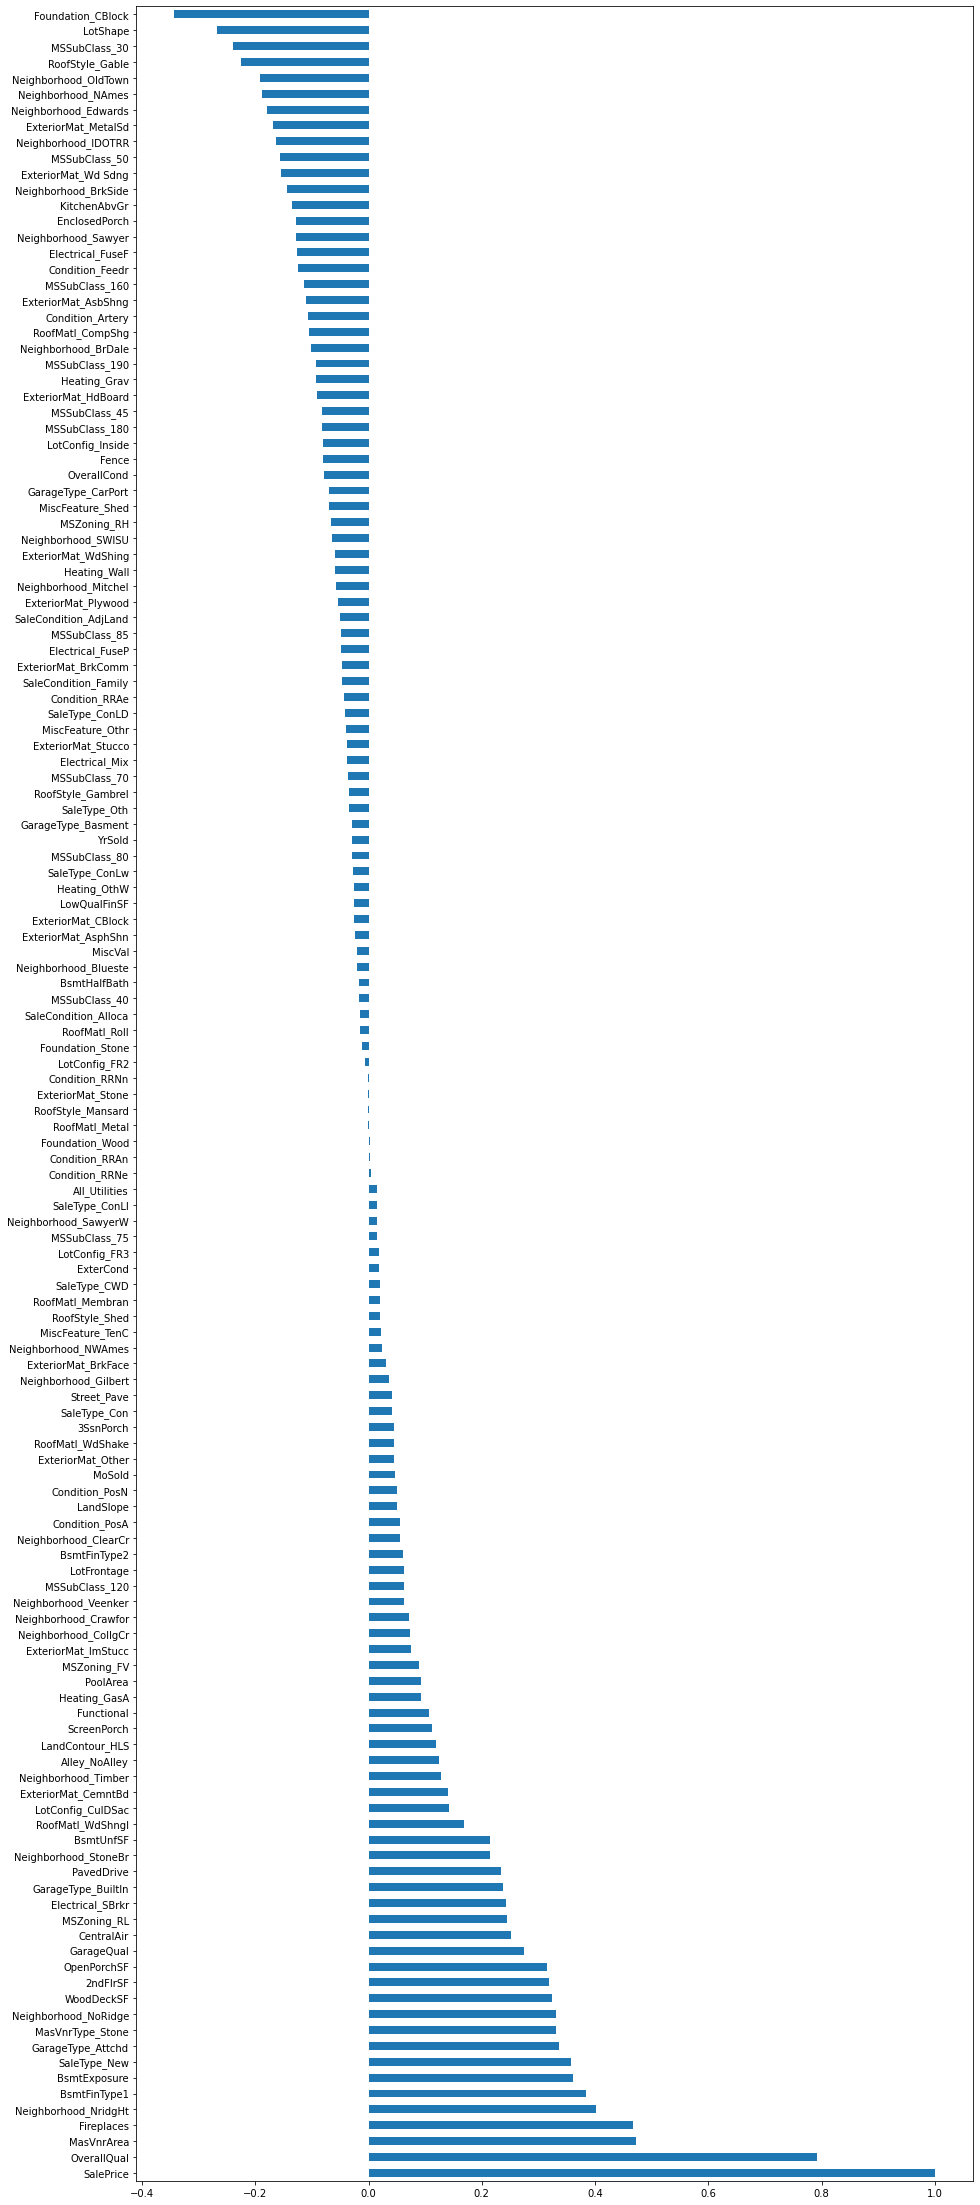

In [111]:
#Correlación de cada variable con Churn
plt.figure(figsize = (15,40))
datos.corr()['SalePrice'].sort_values(ascending = False).plot(kind ='barh',)

# Regresión lineal


In [112]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from scipy import stats

## Separar en conjunto de entrenamiento y prueba

In [113]:
y = datos['SalePrice']
X = datos.drop(['SalePrice'], axis=1)

In [114]:
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split (X, y,
                                                             test_size = 0.2,
                                                             shuffle = True,
                                                             random_state = 8 )

In [115]:
# ¿Cómo son los conjuntos de entrenamiento y prueba?
print("Conjunto de entrenamiento")
print("X: ", X_entrena.shape)
print("y: ", y_entrena.shape)

print("Conjunto de prueba")
print("X: ", X_prueba.shape)
print("y: ", y_prueba.shape)


Conjunto de entrenamiento
X:  (1167, 136)
y:  (1167,)
Conjunto de prueba
X:  (292, 136)
y:  (292,)


In [116]:
modelo = LinearRegression().fit(X_entrena, y_entrena)

print('R^2 entrenamiento:', modelo.score(X_entrena, y_entrena))
print('R^2 prueba:', modelo.score(X_prueba, y_prueba))

R^2 entrenamiento: 0.8581325635383453
R^2 prueba: 0.7182174454129155


In [117]:
columnas = X.columns
coeficientes = pd.DataFrame({'coef':modelo.coef_,
                             'variable':list(columnas)})
coeficientes = coeficientes.sort_values('coef').reset_index(drop=True)
print('Intercept:', modelo.intercept_)
coeficientes

Intercept: -203289.56771334636


,coef,variable
0,-109140.996049,MiscFeature_TenC
1,-67582.935098,MSSubClass_180
2,-59254.449380,MSSubClass_160
3,-44470.069821,MSSubClass_120
4,-37736.771187,Heating_OthW
...,...,...
131,45468.095482,RoofMatl_CompShg
132,52467.880969,Neighborhood_StoneBr
133,80573.229504,RoofMatl_WdShake
134,104916.115218,RoofMatl_WdShngl


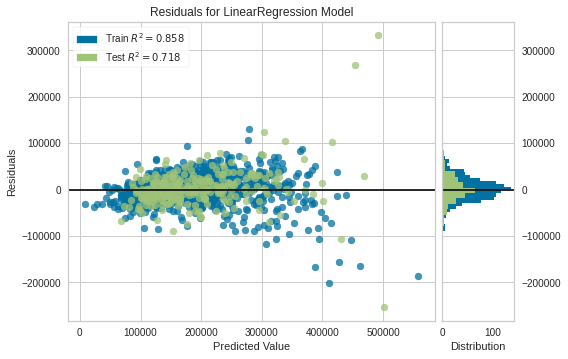

In [118]:
from yellowbrick.regressor import ResidualsPlot
grafico_errores = ResidualsPlot(LinearRegression(), qqplot=False, hist=True)
grafico_errores.fit(X_entrena, y_entrena)
grafico_errores.score(X_prueba, y_prueba)  # Evaluate the model on the test data
grafico_errores.show()         